In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

In [2]:
#Read train dataset
loan_train=pd.read_csv('train.csv')
#Code to retreive the top 5 rows of the train dataset
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Read the test dataset
loan_test=pd.read_csv('test.csv')
#Code to retreive the top 5 rows of the test dataset
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
#Get the number of rows and columns of the train dataset
print('Train dataset contain {} rwos and {} columns'.format(loan_train.shape[0],loan_train.shape[1]))

Train dataset contain 614 rwos and 13 columns


In [5]:
#Get the number of rows and columns of the test dataset
print('Test dataset contain {} rwos and {} columns'.format(loan_test.shape[0],loan_test.shape[1]))

Test dataset contain 367 rwos and 12 columns


In [6]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Train dataset have 5 numerical columns ('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History') and 8 categorical columns('Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status')

In [7]:
#Code to get the categorical columns of the dataset
cat_features=loan_train.select_dtypes(exclude='number').columns
cat_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#Code to get the Numerical columns of the dataset
num_features=loan_train.select_dtypes(include='number').columns
num_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Descriptive Statistics

In [9]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Inferences:

ApplicantIncome:
1. 25% of the customers have income less than 2877.5
2. 50% of the customers income lies in between 2877 and 5795.
3. The average income of customers in the dataset is 5403.459

### Checking for missing values:

In [10]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History columns have missing values.

In [11]:
# Lets replace gender with most frequent or mode value as it is a categorical feature
mode_gen = loan_train.Gender.value_counts().idxmax()# so we can see Male is the most common value so lets replace with it
loan_train.Gender.fillna(mode_gen , inplace=True)

In [12]:
# Lets do same for the married column
loan_train[ "Married"].fillna(loan_train.Married.value_counts().idxmax(), inplace=True) # here all missing values are replace with "YES" as
# It is the most frequent value

In [13]:
loan_train['Dependents'].fillna(loan_train.Dependents.value_counts().idxmax(),inplace=True)

In [14]:
loan_train.Self_Employed.fillna(loan_train.Self_Employed.value_counts().idxmax(), inplace=True)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  


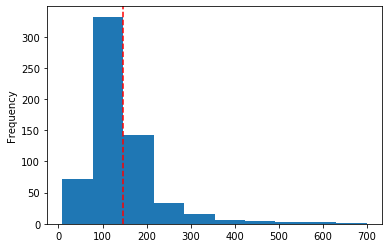

In [24]:
# now lets see for loan amount
loan_train.LoanAmount.plot("hist") # so we can see loan amount is float value. Let plot it first
plt.axvline(x=loan_train.LoanAmount.mean(),color='r', linestyle='--')

In [16]:
# So from our histograme we can see mostly loan amount lies between 100-150 and our mean value is 146. Which means 
# we can replace our missing values with mean in this case.
loan_train.LoanAmount.fillna(loan_train.LoanAmount.mean(), inplace=True)

In [17]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Loan Term column is the number of days for the loan. So here we can not use mean value as mean value probably gives us 
# decimal values and days are obvously not in decimals. So here also lets see what is the most common value.
# We can see 85% cases term value is 360. So we will replace it with this only
loan_train.Loan_Amount_Term.value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [19]:
loan_train.Loan_Amount_Term.fillna(loan_train.Loan_Amount_Term.value_counts().idxmax(), inplace=True)

In [20]:
loan_train.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [21]:
loan_train.Credit_History.fillna(loan_train.Credit_History.value_counts().idxmax(), inplace=True)

In [22]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Treating Outliers

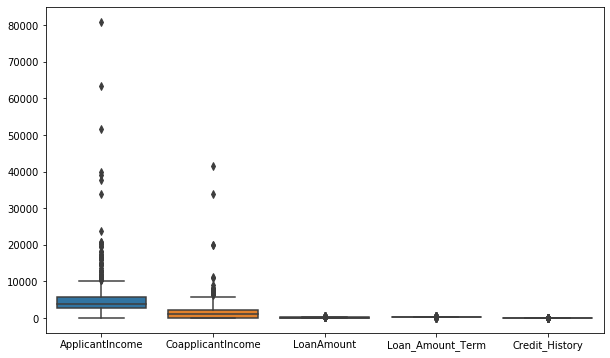

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_train)

There are outliers in the train data set.

In [29]:
x=loan_train.describe()
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
num_features=loan_train.select_dtypes(include='number').columns
for i in num_features:
    q1=x.loc['25%',i]
    q3=x.loc['75%',i]
    iqr=q3-q1
    uppl=q3+(1.5*iqr)
    lowl=q1-(1.5*iqr)
    loan_train[i]=loan_train[i].apply(lambda x:uppl if x>uppl else x )
    loan_train[i]=loan_train[i].apply(lambda x: lowl if x<lowl else x)

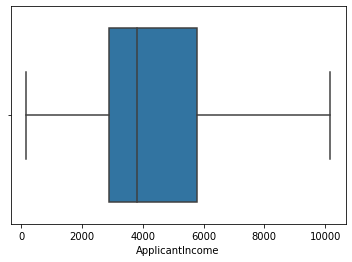

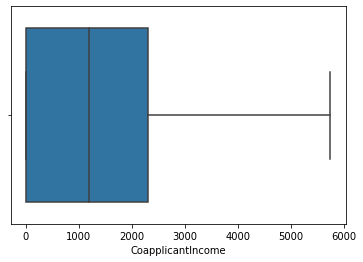

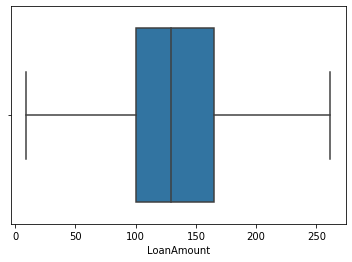

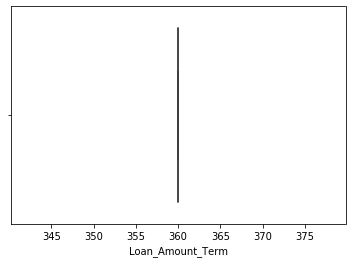

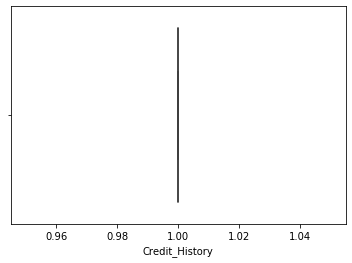

In [36]:
for i in num_features:
    sns.boxplot(loan_train[i])
    plt.show()

There are no outliers

### Exploratory Data Analysis

####  <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Univariate Analysis

In [38]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


#### Applicant Income

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


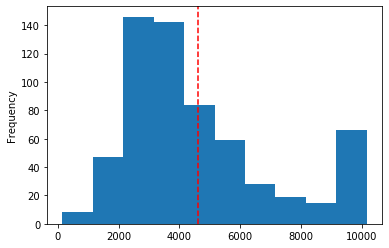

In [41]:
loan_train.ApplicantIncome.plot("hist")
plt.axvline(x=loan_train.ApplicantIncome.mean(),color='r', linestyle='--')

Most of the Applicants income lies in range 3000-4000 and the average applicant income is 4617.11.

### Coapplicant Income

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


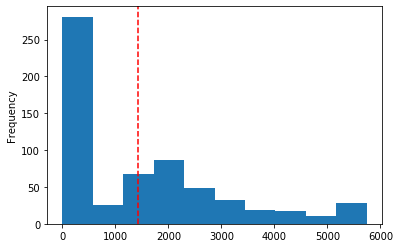

In [45]:
loan_train.CoapplicantIncome.plot("hist")
plt.axvline(x=loan_train.CoapplicantIncome.mean(),color='r', linestyle='--')

Most of the Coapplicants do not have any income and the average income of the coapplicants is 1419.

####  <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#0e92ea"> Bivariate Analysis

#### Loan Status Variable by Gender

Text(0.5, 1.0, 'Distribution of Loan Status Variable by Gender')

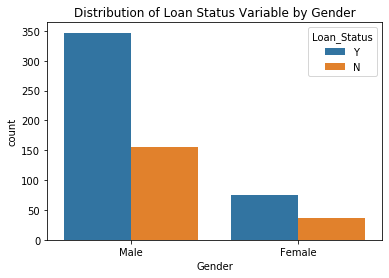

In [62]:
sns.countplot(x=loan_train.Gender,hue=loan_train.Loan_Status)
plt.title("Distribution of Loan Status Variable by Gender")

Most of the Male applicants are eligible for loan.

#### Loan Status Variable by Marital Status

Text(0.5, 1.0, 'Distribution of Loan Status Variable by Marital status')

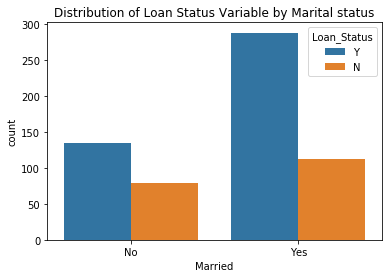

In [61]:
sns.countplot(x=loan_train.Married,hue=loan_train.Loan_Status)
plt.title("Distribution of Loan Status Variable by Marital status")

Most of the Married applicants are eligible for loan.

#### Loan Status Variable by Self-Employment status

Text(0.5, 1.0, 'Distribution of Loan Status Variable by Self Employment status')

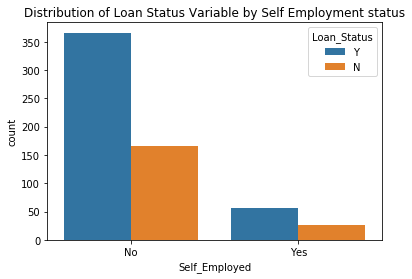

In [60]:
sns.countplot(x=loan_train.Self_Employed,hue=loan_train.Loan_Status)
plt.title("Distribution of Loan Status Variable by Self Employment status")

If the applicant is self employed there is a low chance of loan approval.

#### Loan Status Variable by Property area

Text(0.5, 1.0, 'Distribution of Loan Status Variable by Self property_Area')

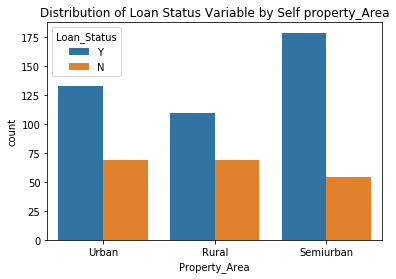

In [59]:
sns.countplot(x=loan_train.Property_Area,hue=loan_train.Loan_Status)
plt.title("Distribution of Loan Status Variable by Self property_Area")

Applicant staying in Semiurban area have high chance of loan approval comapred to Urban and Rural areas.

<Figure size 720x720 with 0 Axes>

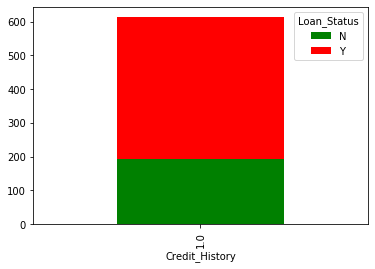

In [154]:
plt.figure(figsize=(10,10))
temp3 = pd.crosstab(loan_train['Credit_History'], loan_train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

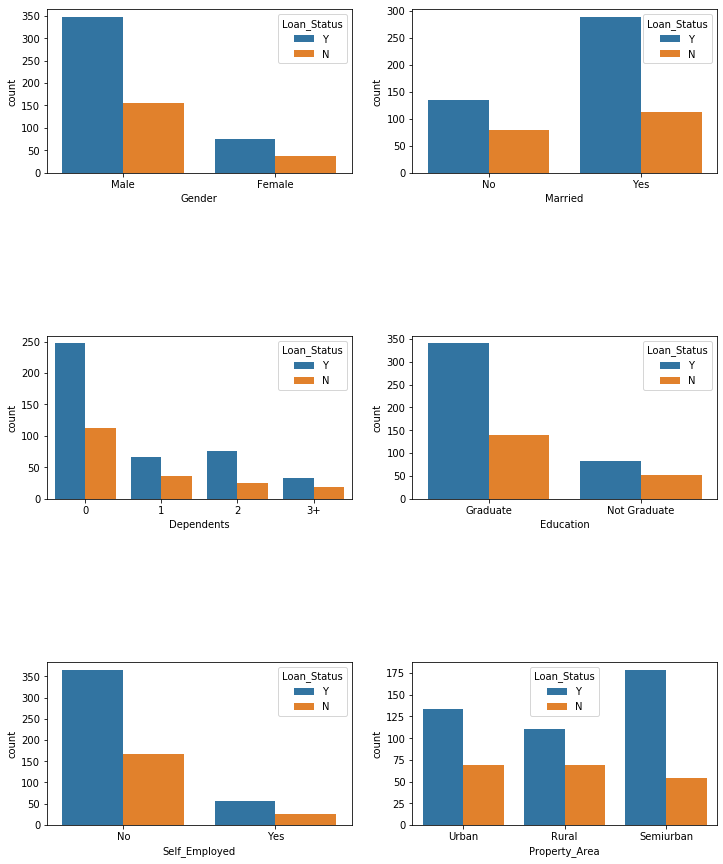

In [66]:
categorical_columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)


1. Applicants who have no dependents have high chances of loan approval.
2. Graduates have high chances of loan approval.
3. Loan Approval Status: About 2/3rd of applicants have been granted loan.
4. Sex: There are more Men than Women (approx. 3x)
5. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
6. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
7. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
8. Employment: 5/6th of population is not self employed.
9. Property Area: More applicants from Semi-urban and also likely to be granted loans.
10. Applicant with credit history are far more likely to be accepted.

### Encoding Categorical Features

In [79]:
df=loan_train
df.drop('Loan_ID',axis=1,inplace=True)

In [82]:
df_dummy=pd.get_dummies(data=df,drop_first=True)
df_dummy

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583.0,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106.0,0.0,40.000000,360.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072.0,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583.0,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [112]:
y=df_dummy.Loan_Status_Y
X=df_dummy.drop('Loan_Status_Y',axis=1)

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve,auc, accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [142]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred=lr.predict(X_test)

In [155]:
accuracy = accuracy_score(y_pred,y_test)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print('Train Score',lr.score(X_train,y_train))
print('Test score',lr.score(X_test,y_test))

Accuracy : 75.610%
Train Score 0.6680244399185336
Test score 0.7560975609756098


In [156]:
confusion_matrix(y_test,y_pred)

array([[ 1, 27],
       [ 3, 92]], dtype=int64)

In [146]:
classification_report(y_test,y_pred).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       0.25      0.04      0.06        28',
 '           1       0.77      0.97      0.86        95',
 '',
 '    accuracy                           0.76       123',
 '   macro avg       0.51      0.50      0.46       123',
 'weighted avg       0.65      0.76      0.68       123',
 '']

In [175]:
test=y_test.reset_index(drop=True)

In [179]:
count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_test.shape[0])
for x in range(len(test)):
    if(test[x] == y_pred[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,15):
    if(test[x] == y_pred[x]):
        #print ("TESTING RECORD - ",X_test[x])
        print ("ACTUAL OUTPUT - ", test[x])
        print ("PREDICTED OUTPUT - ",y_pred[x])
        print ("_________________________________")

TOTAL NUMBER OF TESTING RECORD -  123
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  93


ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
ACTUAL OUTPUT -  0
PREDICTED OUTPUT -  0
_________________________________


In [147]:
logit= LogisticRegressionCV()
logit.fit(X_train, y_train)

logit_pred= logit.predict(X_test)

print(accuracy_score(y_test, logit_pred))

confusion_matrix(y_test, logit_pred)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7723577235772358


array([[ 0, 28],
       [ 0, 95]], dtype=int64)

In [136]:
accuracy_score(logit_pred,y_test)
print('Train Score',logit.score(X_train,y_train))
print('Test score',logit.score(X_test,y_test))

Train Score 0.6863543788187373
Test score 0.6910569105691057


In [148]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1')) 
#Penalty is there for Logistic Regression not for Linear Regression
sel_.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [149]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 11
features with coefficients shrank to zero: 3


In [150]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Credit_History', 'Dependents_3+', 'Self_Employed_Yes'], dtype='object')